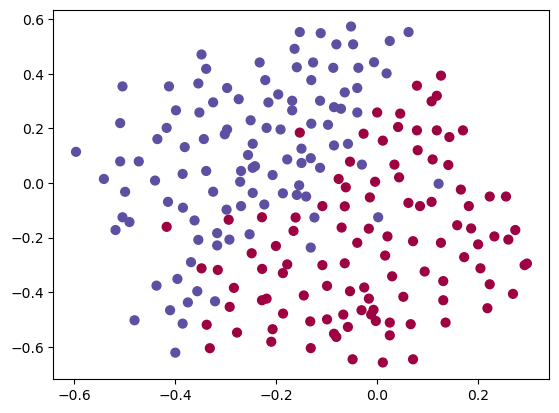

In [27]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);

In [28]:
from keras import models
from keras.layers import Dense 

model_noreg = models.Sequential()

model_noreg = models.Sequential()
model_noreg.add(Dense(29, input_shape=(2,), activation='relu'))
model_noreg.add(Dense(25, activation='relu'))
model_noreg.add(Dense(16, activation='relu'))
model_noreg.add(Dense(1, activation='sigmoid'))

model_noreg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_noreg.fit(train_X.T,train_y.T, epochs=2000, batch_size=10)

Epoch 1/2000
22/22 [==============================] - 2s 5ms/step - loss: 0.6836 - accuracy: 0.4976
Epoch 2/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.7725
Epoch 3/2000
22/22 [==============================] - 0s 7ms/step - loss: 0.6105 - accuracy: 0.8009
Epoch 4/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.5442 - accuracy: 0.8199
Epoch 5/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.8389
Epoch 6/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.3997 - accuracy: 0.8578
Epoch 7/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.8720
Epoch 8/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.8815
Epoch 9/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9052
Epoch 10/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.9052

In [29]:
_, accuracy = model_noreg.evaluate(train_X.T, train_y.T)
print('Accuracy: %.2f' % (accuracy*100))


7/7 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 1.0000
Accuracy: 100.00


In [30]:

_, test_accuracy = model_noreg.evaluate(test_X.T, test_y.T)
print('loss: %.2f' % (test_accuracy*100))

7/7 [==============================] - 1s 3ms/step - loss: 1.2674 - accuracy: 0.9300
loss: 93.00


In [31]:
from keras import models
from keras.layers import Dense
from keras import regularizers

model_reg = models.Sequential()
model_reg.add(Dense(25, input_shape=(2,), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(1, activation='sigmoid'))

model_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_reg.fit(train_X.T,train_y.T, epochs=2000, batch_size=10)

Epoch 1/2000
22/22 [==============================] - 2s 2ms/step - loss: 1.1969 - accuracy: 0.5024
Epoch 2/2000
22/22 [==============================] - 0s 3ms/step - loss: 1.1164 - accuracy: 0.7204
Epoch 3/2000
22/22 [==============================] - 0s 2ms/step - loss: 1.0428 - accuracy: 0.6919
Epoch 4/2000
22/22 [==============================] - 0s 2ms/step - loss: 0.9739 - accuracy: 0.7678
Epoch 5/2000
22/22 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.7393
Epoch 6/2000
22/22 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.7867
Epoch 7/2000
22/22 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.8057
Epoch 8/2000
22/22 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.7962
Epoch 9/2000
22/22 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.8436
Epoch 10/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.8626

In [32]:
_, accuracy2 = model_reg.evaluate(train_X.T, train_y.T)
print('Accuracy: %.2f' % (accuracy2*100))

7/7 [==============================] - 0s 5ms/step - loss: 0.2837 - accuracy: 0.9242
Accuracy: 92.42


In [33]:
_, test_accuracy2 = model_reg.evaluate(test_X.T, test_y.T)
print('loss: %.2f' % (test_accuracy2 *100))

7/7 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.9350
loss: 93.50


32813/32813 [==============================] - 77s 2ms/step


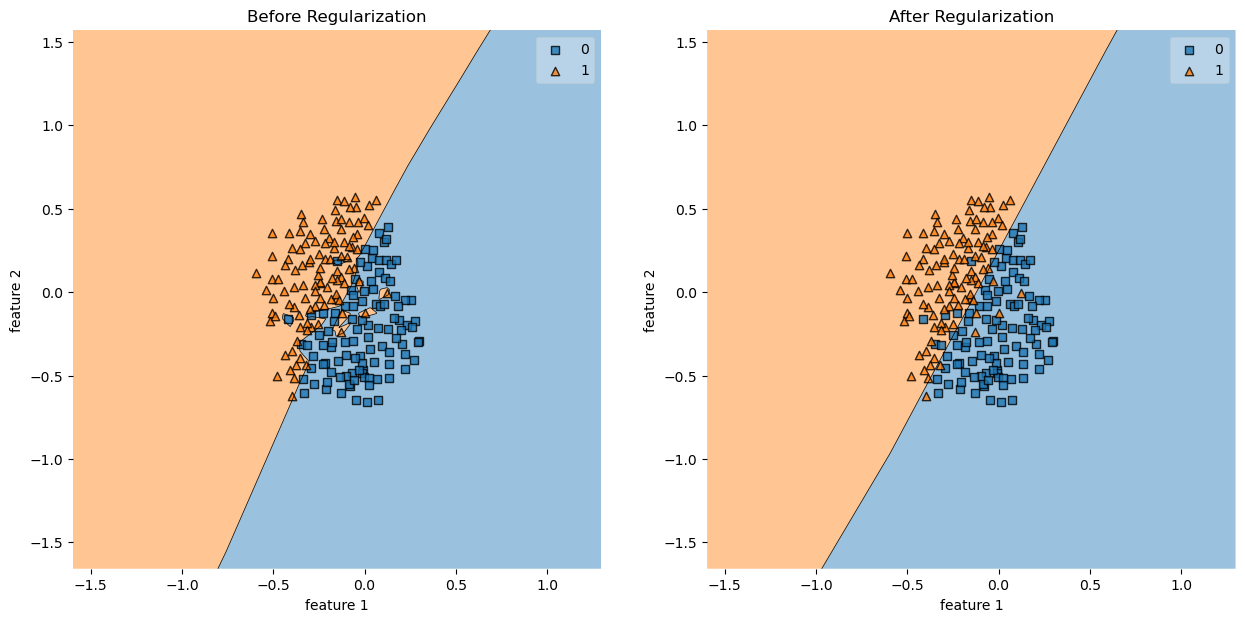

In [34]:
from mlxtend.plotting import plot_decision_regions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('Before Regularization')
ax1.set_xlim(-0.75, 0.5)
ax1.set_ylim(-1, 0.75)


ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
ax2.set_title('After Regularization')
ax2.set_xlim(-0.75, 0.5)
ax2.set_ylim(-1, 0.75)
plot_decision_regions(train_X.T, train_y.ravel(), clf=model_noreg, ax=ax1)

plot_decision_regions(train_X.T, train_y.ravel(), clf=model_reg, ax =ax2)
plt.show()